<a href="https://colab.research.google.com/github/davoodwadi/davoodwadi.github.io/blob/main/week7-Unsupervised/Unsupervised_questions_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH60629A
# Week \#7 - Unsupervised Learning - Exercises

This practical session focuses on two tasks which used unsupervised learning, namely clustering (Sections 7.2 and 7.3) and dimensionality reduction (Section 7.4). The goal of this tutorial is to develop basic intuition behind some classic algorithms used for unsupervised learning (k-means, GMMs, and autoencoders).

In [1]:
# Classic libraries
import pandas as pd
import numpy as np

# Data science libraries
import sklearn as sk
from sklearn.cluster import KMeans   # KMeans function
from sklearn.datasets import make_circles, make_blobs  # Datasets
from sklearn.model_selection import train_test_split   # Cross validation library
from sklearn import mixture

# Data visualization libaries
import matplotlib.pyplot as plt
# A must! For nice an easy figures - look for sns command in the notebook
import seaborn as sns
from matplotlib.pyplot import cm   # This is a nice color chart

%matplotlib inline

# Code to obtain utilities.py
!wget -nc https://raw.githubusercontent.com/lcharlin/80-629/master/week7-Unsupervised/utilities.py
!mkdir Images
!wget -nc -P Images https://raw.githubusercontent.com/lcharlin/80-629/master/week7-Unsupervised/Images/AE.png

# Homemade libraries
from utilities import color, super_scat_it, distance, initiate, estimate_centroid

--2023-10-17 12:46:29--  https://raw.githubusercontent.com/lcharlin/80-629/master/week7-Unsupervised/utilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4292 (4.2K) [text/plain]
Saving to: ‘utilities.py’

utilities.py        100%[===================>]   4.19K  --.-KB/s    in 0s      

2023-10-17 12:46:29 (48.0 MB/s) - ‘utilities.py’ saved [4292/4292]

--2023-10-17 12:46:30--  https://raw.githubusercontent.com/lcharlin/80-629/master/week7-Unsupervised/Images/AE.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55744 (54K

## 7.1 Data generation

Let's first look at [Gaussian mixtures](https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model), a relatively simple model, which we will generate with the [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) function.

**Remark**: In order to properly run Section 7.2.1, do not change the attributes of the `make_blobs` function in the code snippet below.

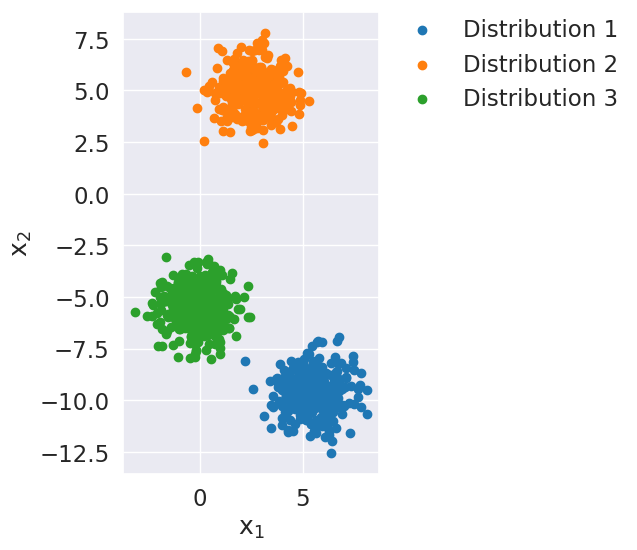

In [166]:
nb_obs = 1000   # Number of observation
k = 3   # Number of clusters

# try 4 and 1
std = 1   # Standard deviation associated to the isotopic Gaussian Mixture -
dim = 2   # Covariates dimension - if dim > 2, don't expect data vizualisation from matplotlib!
seed = 10   # Random seed to replicate the experience

# Data generation
X, y = make_blobs(n_samples=nb_obs, centers=k, cluster_std=std,
                  n_features=dim, random_state=seed)

# Data visualization - see utilities.py script
super_scat_it(X, y, k)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
import seaborn as sns

<Axes: >

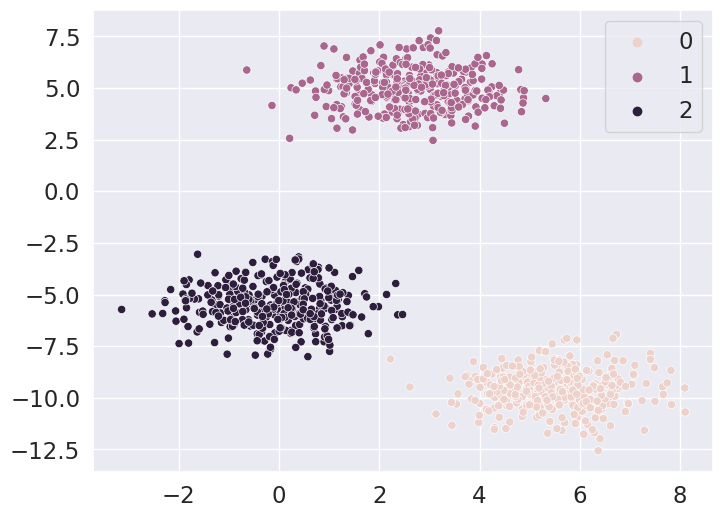

In [167]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

## 7.2 Clustering: K-means Algorithm


### 7.2.1 Implementation with numpy

The objective of this section is to implement and understand the procedures associated with the k-means algorithm. First, we will therefore implement the k-means algorithm with numpy.

**Question 7.1**

According to the pseudo code presented on [Slide 18 of the course](http://www.cs.toronto.edu/~lcharlin/courses/80-629/slides_unsupervised.pdf), complete the `fit` function of the `k_means` class below.

In [7]:
X.shape

(1000, 2)

In [183]:
centroid = np.array([
    [0,0],
    [10,10],
    [-10,-10]
])
centroid

array([[  0,   0],
       [ 10,  10],
       [-10, -10]])

In [54]:
centroid[0].shape

(2,)

In [55]:
k = 3

In [169]:
# C0
# distance of X, C0

'''
X: (n, 2)
Ci: (2,)
'''
distList=[]
for i in range(k):
  dist = ((X - centroid[i])**2).sum(-1)
  distList.append(dist)
dists = np.stack(distList, axis=-1)
dists.shape

(1000, 3)

In [170]:
dists[0]

array([119.86211768, 427.46909266, 212.25514271])

In [171]:
label = np.argmin(dists, axis=-1)
# label

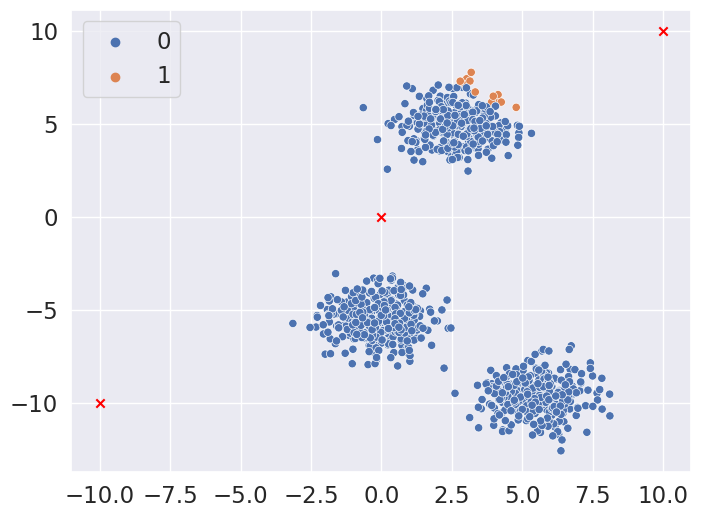

In [172]:
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=label)
ax.scatter(centroid[:,0], centroid[:,1], marker='x', color='red')

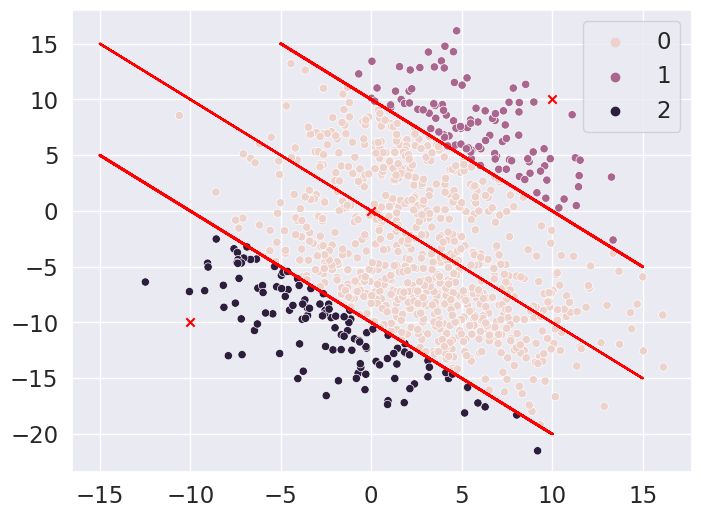

In [130]:
x1 = np.linspace(-15,15, num=2000)
x2 = np.linspace(-20,15, num=2000)
x1_mesh, x2_mesh = np.meshgrid(x1,x2)

x1_mesh = x1_mesh.ravel()
x2_mesh = x2_mesh.ravel()
x_mesh = np.stack([x1_mesh, x2_mesh], axis=-1)
tol = 1.
c0 = centroid[0]
c1 = centroid[1]
c2 = centroid[2]
dist_c0 = ((x_mesh-c0)**2).sum(-1)
dist_c1 = ((x_mesh-c1)**2).sum(-1)
dist_c2 = ((x_mesh-c2)**2).sum(-1)

equidistance_idx_01 = np.where(np.abs(dist_c0 - dist_c1)<tol)[0]
equidistance_idx_02 = np.where(np.abs(dist_c0 - dist_c2)<tol)[0]
equidistance_idx_12 = np.where(np.abs(dist_c1 - dist_c2)<tol)[0]

ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=label)
ax.scatter(centroid[:,0], centroid[:,1], marker='x', color='red')

ax.plot(x_mesh[equidistance_idx_01][:,0], x_mesh[equidistance_idx_01][:,1], color='red')
ax.plot(x_mesh[equidistance_idx_02][:,0], x_mesh[equidistance_idx_02][:,1], color='red')
ax.plot(x_mesh[equidistance_idx_12][:,0], x_mesh[equidistance_idx_12][:,1], color='red')

In [218]:
pairs = []

for i in range(4):
    for j in range(i + 1, 4):
        pairs.append((i, j))
pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [219]:
def plot_kmeans(X, label, centroid):
  x1 = np.linspace(-15,15, num=2000)
  x2 = np.linspace(-20,15, num=2000)
  x1_mesh, x2_mesh = np.meshgrid(x1,x2)

  x1_mesh = x1_mesh.ravel()
  x2_mesh = x2_mesh.ravel()
  x_mesh = np.stack([x1_mesh, x2_mesh], axis=-1)
  tol = 1.

  ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=label)
  ax.scatter(centroid[:,0], centroid[:,1], marker='x', color='red')


  distList = []
  for i in range(k):
    # c0 = centroid[0]
    # c1 = centroid[1]
    # c2 = centroid[2]
    dist_c = ((x_mesh-centroid[i])**2).sum(-1)
    distList.append(dist_c)
    # dist_c1 = ((x_mesh-c1)**2).sum(-1)
    # dist_c2 = ((x_mesh-c2)**2).sum(-1)
  for i in range(k):
    for j in range(i+1, k):
      equidistance_idx = np.where(np.abs(distList[i] - distList[j])<tol)[0]
      print(f'index: {equidistance_idx}')
      ax.plot(x_mesh[equidistance_idx][:,0], x_mesh[equidistance_idx][:,1], color='red')
  return ax

In [210]:
k

1

skipping 0 0


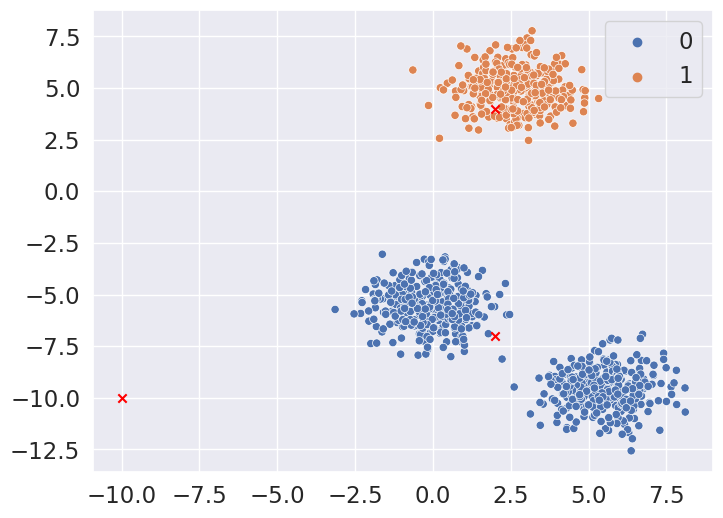

In [209]:
ax = plot_kmeans(X,label,centroid)

## update the centroids and cluster assignments

In [136]:
# estimate new centroids
centroid0_points = X[label==0]
centroid0_points.shape
new_estimate_c0 = centroid0_points.mean(axis=0)
new_estimate_c0

array([ 2.95033471, -3.83214435])

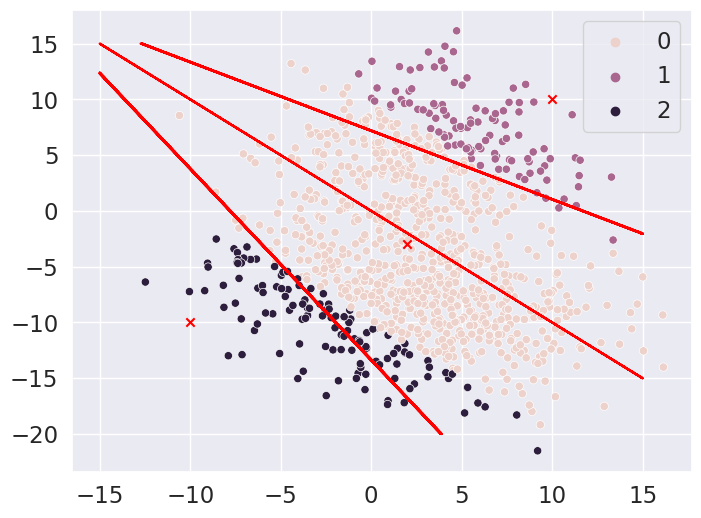

In [138]:
centroid[0,:] = new_estimate_c0
plot_kmeans(X,label,centroid)

## k means - updates

<ipython-input-188-21840a6623db>:4: RuntimeWarning: Mean of empty slice.
  new_estimate_c = centroid_points.mean(axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


empty cluster: 2


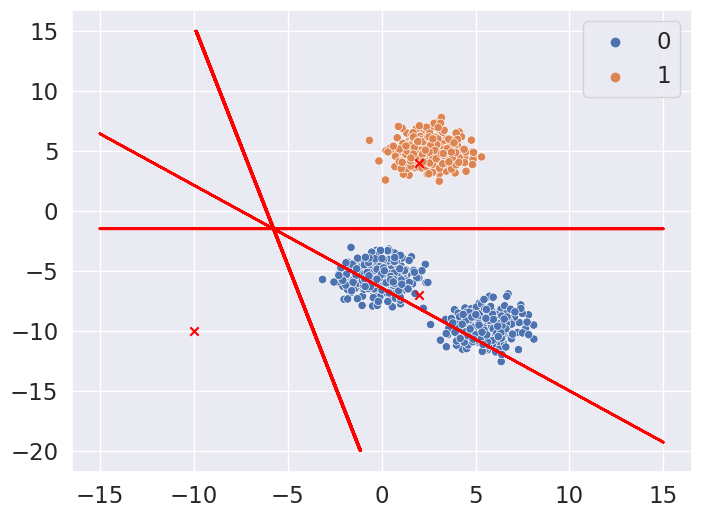

In [188]:
# Step1: estimate new centroids
for i in range(k):
  centroid_points = X[label==i]
  new_estimate_c = centroid_points.mean(axis=0)
  if np.any(np.isnan(new_estimate_c)):
    print(f'empty cluster: {i}')
    continue
  centroid[i,:] = new_estimate_c
plot_kmeans(X,label,centroid)

In [189]:
# Step 2: recalculate the distances
distList=[]
for i in range(k):
  dist = ((X - centroid[i])**2).sum(-1)
  distList.append(dist)
dists = np.stack(distList, axis=-1)

# Step 3: reassign data points
old_label = label
label = np.argmin(dists, axis=-1)
if np.all(label == old_label):
  print('converged')
else:
  print(f'{(label != old_label).sum()} points changed clusters')

converged


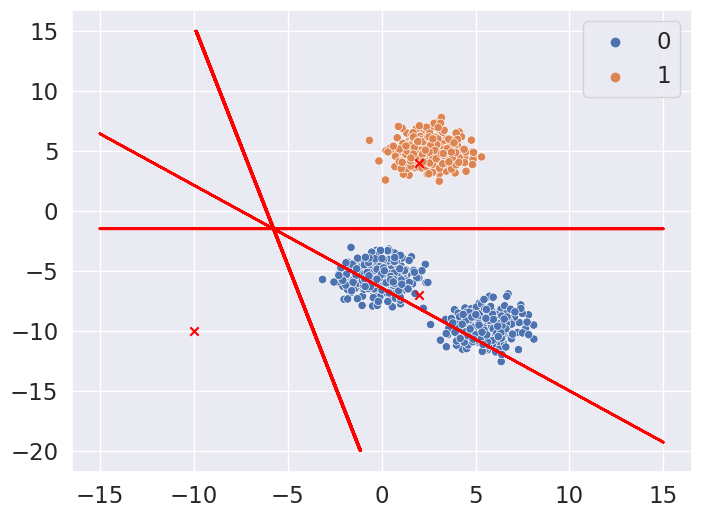

In [190]:
plot_kmeans(X, label, centroid)

In [192]:
class k_means:

    def __init__(self, data, k, seed=None):
        """
        Args:
            data: unlabeled data
            k: number of cluster
        Class Attributes:
            self.data: unlabeled data
            self.centroid: cluster centers
            self.label: label
            self.iteration: number of iteration before k-means converges
        """

        self.data = data
        # centroid shape: (k, X.shape[1])
        self.centroid = np.random.randn(k, data.shape[1])
        # initiate(data, k)
        self.label = np.argmin(distance(self.data, self.centroid ), axis=1)

    def fit(self):

        # step 1. update the cluster centers
        self.centroid = estimate_centroid(self.data, self.label)
        # step 2. update the responsibilities (i.e., the cluster each point belongs to)
        label_new = np.argmin(distance(self.data, self.centroid), axis=1)

        # run both steps until convergence
        while label_new.tolist() != self.label.tolist():
            self.label = label_new
            # step 1.
            # step 2.

        self.label = label_new
        # compute the objective function
        self.objective = np.mean(np.min(distance(self.data, self.centroid), axis=1))

We can now call the above `k_means` class, estimate the centroids and visualize the associated clusters!

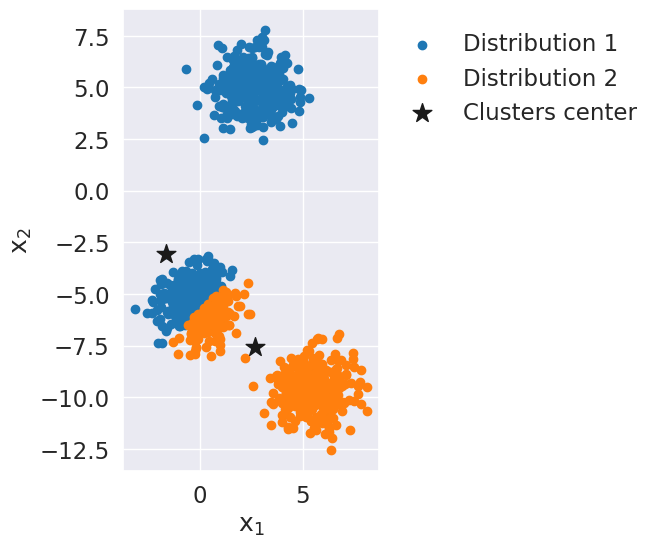

In [193]:
km = k_means(X, k)
km.fit()

super_scat_it(X, km.label, dim, km.centroid)

### 7.2.2 Exploration of the K-means Algorithm with Scikit Learn

Once the algorithm has been coded, we are going to make our life easier and simply use the [Scikit Learn library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (-_-).  First, let's check that everything is running fine.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


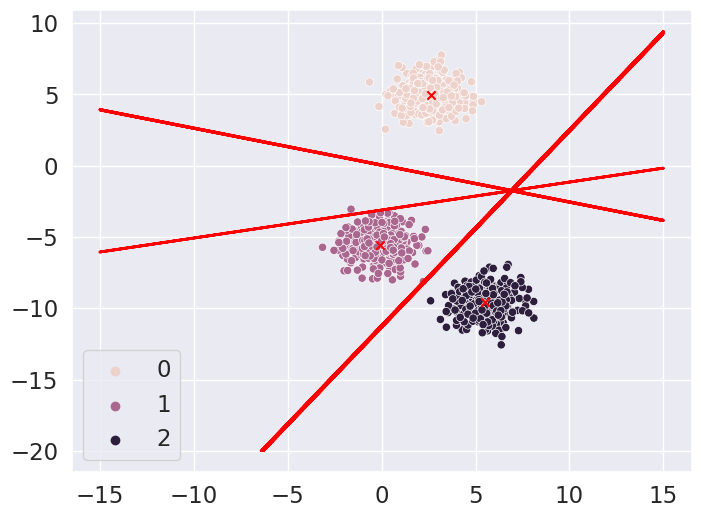

In [195]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
# super_scat_it(X, kmeans.labels_, dim, kmeans.cluster_centers_)
plot_kmeans(X, kmeans.labels_, kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


index: [1636000 1636001 1636002 ... 2339997 2339998 2339999]
index: [    629     630     631 ... 3591998 3591999 3593999]
index: [    833     834     835 ... 2747998 2747999 2749999]
index: [1780000 1780001 1780002 ... 2165997 2165998 2165999]
index: [    447     448     449 ... 3343998 3343999 3345999]
index: [2013996 2013997 2013998 ... 2496000 2496001 2496002]
index: [1426000 1426001 1428000 ... 2359997 2359998 2359999]
index: [    287     288     289 ... 3999546 3999547 3999548]
index: [1905999 1907994 1907995 ... 2760006 2762000 2762001]
index: [    678     679     680 ... 3383998 3383999 3385999]
index: [1769997 1769998 1769999 ... 2736005 2738000 2738001]
index: [ 482000  484000  484001 ... 2847999 2849998 2849999]
index: [1550000 1550001 1552000 ... 2197997 2197998 2197999]
index: [    522     523     524 ... 3231998 3231999 3233999]
index: [1617999 1619996 1619997 ... 3058003 3060000 3060001]


<Axes: >

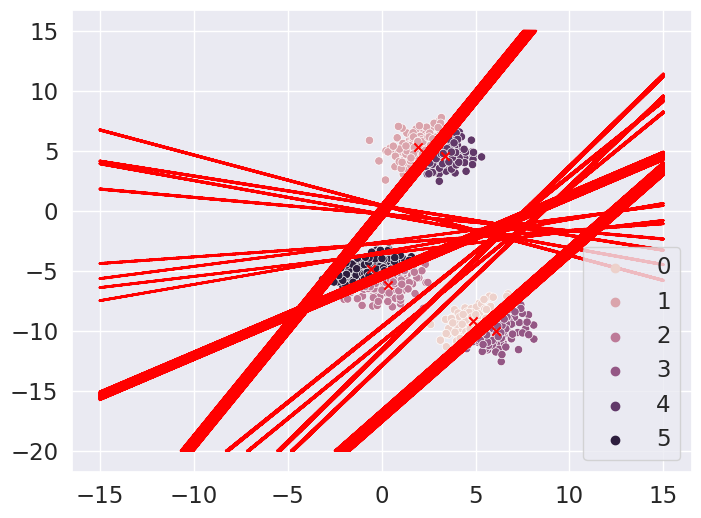

In [222]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
# super_scat_it(X, kmeans.labels_, dim, kmeans.cluster_centers_)
plot_kmeans(X, kmeans.labels_, kmeans.cluster_centers_)

### measure of error and Silhouette Score

### probabilistic k-means

In [246]:
from torch import nn
import torch
dist = torch.tensor([100., 99.])
dist

tensor([100.,  99.])

In [247]:
nn.Softmax()(dist)

<ipython-input-247-8bed872556d3>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  nn.Softmax()(dist)


tensor([0.7311, 0.2689])

### 7.2.3 Choosing the optimal number of clusters

In our first experiment, we knew the actual number of subpopulations (parameterized by the variable $ k $) associated with the simulated data. On the other hand, with non simulated datasets, we typically do not know the correct number of clusters. It is therefore important to develop methodologies in order to clearly define the number of clusters required.

**Questions 7.2**

1. Find a simple way to determine the optimal number of clusters. (hint: using a validation set.)
2. Implement it. (see below for an initial implementation)
3. How many clusters would you choose?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

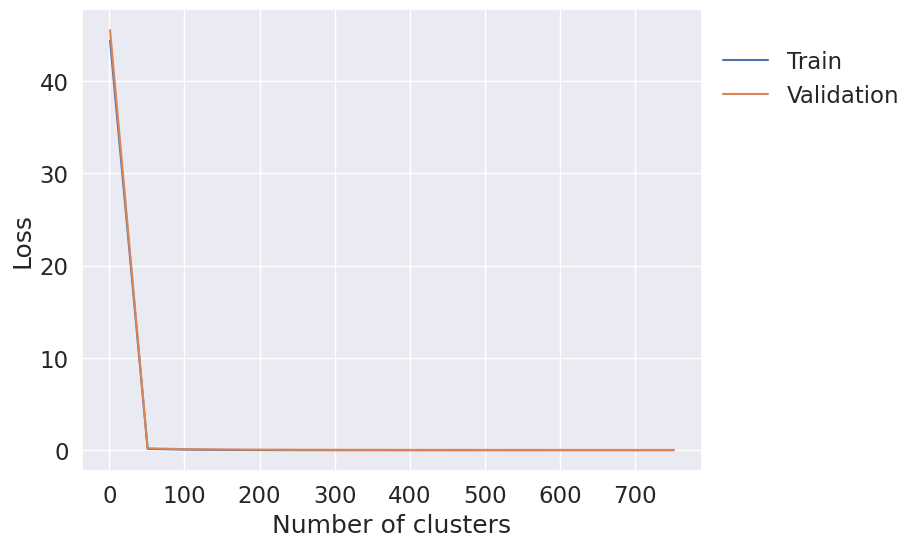

In [255]:
X_train, X_valid, _, _ = train_test_split(X, y, test_size=0.2, random_state=0)
loss_train, loss_valid = [], []

# max_cluster = 50
cluster_numbers = np.arange(0, X_train.shape[0], 50)+1
for k in cluster_numbers:
    # TODO: complete.
    # 1) run K-means.
    km = KMeans(k)
    # 2) Evaluate its result on the train set
    km.fit(X_train)
    # 3) Evaluate its result on the validation set
    loss_train.append(np.mean(np.min(distance(X_train, km.cluster_centers_), axis=1)))
    loss_valid.append(np.mean(np.min(distance(X_valid, km.cluster_centers_), axis=1)))

plt.plot(cluster_numbers, loss_train, label='Train')
plt.plot(cluster_numbers, loss_valid, label='Validation')

plt.xlabel('Number of clusters')
plt.ylabel('Loss')

# Ghosting the legend
leg = plt.gca().legend(loc='center left', bbox_to_anchor=(1, .85))
leg.get_frame().set_alpha(0)

**Questions 7.3**

   1. Are you disappointed by the behaviour of the curve associated to the validation set?
   2. Considering the results obtained here, could you imagine a better way to know the optimal number of clusters?

The previous exercise was based on a relatively simple dataset. Indeed, there was a large number of observations ($n = 1000$) for a relatively small variable space ($\bf{X} \in \mathbb{R}^2$) and small number of clusters ($k = 2$). In order to validate the relevance of the cross-validation procedure to fix the number of clusters, let's now simulate a slightly more complex dataset.

In [ ]:
nb_obs = 100   # Number of observation
k = 10   # Number of clusters
std = 4   # Standard deviation associated to the isotopic Gaussian Mixture -
dim = 50   # Covariates dimension - if dim > 2
           # (don't expect data vizualisation from matplotlib)
seed = 10   # Random seed to replicate the experience

X, y = make_blobs(n_samples=nb_obs, centers=k, cluster_std= std,
                  n_features=dim, random_state=seed)   # Data generation

Let's now look how the loss associated to the validation set behave on a more complex dataset.

In [ ]:
X_train, X_valid, _, _ = train_test_split(X, y, test_size=0.2, random_state=0)
loss_train, loss_valid = [], []

max_cluster = 50

for k in np.arange(max_cluster)+1:
    # TODO: complete, you can use the same code as above
    pass

plt.plot(np.arange(max_cluster)+1, loss_train, label='Train')
plt.plot(np.arange(max_cluster)+1, loss_valid, label='Validation')

plt.xlabel('Number of clusters')
plt.ylabel('Loss')

# Ghosting the legend
leg = plt.gca().legend(loc='center left', bbox_to_anchor=(1, .85))
leg.get_frame().set_alpha(0)

**Questions 7.4**

   1. Are you surprised by the behavior of the curve associated to the training set?
   2. Are you disappointed by the behavior of the curve associated to the validation set?

## 7.3 Clustering - The Gaussian Mixture Model

We now consider the [Expectation Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) (EM) in order to estimate mixtures of Gaussians. As presented on [Slides 26 to 41 of the course](http://www.cs.toronto.edu/~lcharlin/courses/80-629/slides_unsupervised.pdf), the idea is simply to associate each observation with a probability of belonging to one or the other of the distributions.

Coding the EM algorithm in numpy can be a tedious exercise, so we'll just use the GMM implementation provided by sklearn: [sklearn GMMs](https://scikit-learn.org/0.16/modules/generated/sklearn.mixture.GMM.html)

In [ ]:
# first, we generate some data
cluster_std=4
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=cluster_std,
                  n_features=2, random_state=10)

# fit the GMM model
nb_components = 2
GMM = mixture.GaussianMixture(n_components=nb_components,
                              covariance_type='full')
GMM.fit(X)

# Plot the clustering result, where the color of the points indicate
# to which cluster they probabilistically belong to.
super_scat_it(X, GMM.predict_proba(X), dim=nb_components,
              clusters_center=0, task='EM')

**Questions 7.5**

1. After a quick glance at the figure above, what do you notice that is different from the k-means algorithm?
2. What would have happened if we had set the parameter associated with the variance of the sub-populations (`cluster_std`) to 2?

### 7.3.1 Choosing the optimal number of clusters for a GMM

**Questions 7.6**

1. How do we find the right number of clusters?
2. Do the train/validation curves behave similarly to those of the k-means algorithm (e.g. in Section 7.2.3)? Does it make sense?

<i>Additional information:</i> To evaluate the performance of an algorith, in machine learning we tend to stick with the validation set. However, we could use a model selection criterium from the statistics literature such as the [Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) which penalized nonparsimonious models.

In [ ]:
X_train, X_valid, _, _ = train_test_split(X, y, test_size=0.2, random_state=0)
loss_train, loss_valid = [], []

for k in np.arange(max_cluster)+1:
    GMM = mixture.GaussianMixture(n_components=k, covariance_type='full')
    GMM.fit(X_train)

    loss_train.append(GMM.score(X_train))
    loss_valid.append(GMM.score(X_valid))

plt.plot(np.arange(max_cluster)+1, loss_train, label='Train')
plt.plot(np.arange(max_cluster)+1, loss_valid, label='Validation')

plt.xlabel('Number of clusters')
plt.ylabel('Log-Likelihood (Maximize)')

# Ghosting the legend
leg = plt.gca().legend(loc='center left', bbox_to_anchor=(1, .85))
leg.get_frame().set_alpha(0)

## 7.4 Dimensionality Reduction: Autoencoder

### 7.4.1 Model

Autoencoders (AE) are a class of neural networks that allow unsupervised learning of the latent characteristics of the data being studied (see capsule 4 of week 7 or [Chapter 14](http://www.deeplearningbook.org/contents/autoencoders.html) of the [Deep Learning book](http://www.deeplearningbook.org/)). To do this, the AE will attempt to predict, or copy, the input observations using (multiple) transformations (hidden layer). In its simplest form, the architecture of an AE can be summarized in the diagram below.

![title](https://github.com/lcharlin/80-629/blob/master/week7-Unsupervised/Images/AE.png?raw=1)

Looking more closely, the AE consists of an encoder, the function $h(\cdot)$ defined by:

$$
\begin{align}
    h(\mathbf{x}) = \frac{1}{1+ \exp(-\mathbf{W} \mathbf{x})}.
\end{align}
$$

This function takes as input the observations and will consist of recoding it as a hidden layer so as to reduce their size (fewer neurons). Afterwards, an encoder defined by:

$$
\begin{align}
    f(h(\mathbf{x})) = \mathbf{W}^\top h(\mathbf{x})
\end{align}
$$

will attempt <i>to reconstruct </i> the input observations from the hidden layer. In this sense, the AE tries to estimate the observations used as input.

### 7.4.3 Data simulation

Let's first simulate more complex Gaussian mixtures (look at the number of clusters and the dimension of the data) in order to understand the behaviour of the AEs.

In [ ]:
nb_obs = 10**4  # Number of observations
k = 3           # Number of groups
std = 0.01      # Standard deviation for each blob
dim = 5         # Data dimensions
seed = 10       # Seed to control the data generation

X, y = make_blobs(n_samples=nb_obs, centers=k, cluster_std=std,
                  n_features=dim, random_state=10)   # Data generation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

**!! Remark !!**

There's no specific class for autoencoders in `sklearn`, but since AEs are a type of feed-forward network we can simply reuse the `MLP` classes (e.g., `MLPRegressor`) to build an AE.

Note that there exists un library called `scikit-neuralnetwork` which offers [AE models](https://scikit-neuralnetwork.readthedocs.io/en/latest/guide_sklearn.html#unsupervised-pre-training) directly using an sklearn-like interface. You could of course also use PyTorch.

In [ ]:
import warnings # to remove some sklearn warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPRegressor

learning_rate = 1e-1
aenn = MLPRegressor(hidden_layer_sizes=(2), # a single hidden layer of size 2
             activation='logistic',
             solver='adam',
             alpha=0.0001,
             batch_size='auto',
             early_stopping=True,
             learning_rate_init=learning_rate,
             verbose=True)

# Since we use early_stopping builtin into the MLPRegressor,
# we use both train and validation as our training set.
aenn.fit(np.vstack((X_train, X_valid)), np.vstack((X_train, X_valid)))

# If we had wanted to use our original validation dataset
# we could have used the partial_fit() function
# For example,
#from sklearn.metrics import mean_squared_error
#max_epochs = 100
#mse_train, mse_valid = [], []
#for i in range(max_epochs):
#    aenn.partial_fit(X_train, X_train)
#    train_pred = aenn.predict(X_train)
#    mse_train.append(mean_squared_error(X_train, train_pred))
#
#    valid_pred = aenn.predict(X_valid)
#    mse_valid.append(mean_squared_error(X_valid, valid_pred))

Iteration 1, loss = 12.56434415
Validation score: 0.612601
Iteration 2, loss = 5.14832218
Validation score: 0.817819
Iteration 3, loss = 2.60939457
Validation score: 0.903460
Iteration 4, loss = 1.37251663
Validation score: 0.950421
Iteration 5, loss = 0.69240844
Validation score: 0.975491
Iteration 6, loss = 0.33480555
Validation score: 0.988312
Iteration 7, loss = 0.15612936
Validation score: 0.994740
Iteration 8, loss = 0.06906778
Validation score: 0.997731
Iteration 9, loss = 0.02909374
Validation score: 0.999088
Iteration 10, loss = 0.01164580
Validation score: 0.999651
Iteration 11, loss = 0.00447650
Validation score: 0.999873
Iteration 12, loss = 0.00173876
Validation score: 0.999956
Iteration 13, loss = 0.00075062
Validation score: 0.999985
Iteration 14, loss = 0.00042251
Validation score: 0.999994
Iteration 15, loss = 0.00032012
Validation score: 0.999996
Iteration 16, loss = 0.00029073
Validation score: 0.999997
Iteration 17, loss = 0.00028294
Validation score: 0.999997
Itera

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=2, learning_rate='constant',
             learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

**Question 7.7**

Why should the dimension of the hidden layer be smaller than the dimension of the input layer?

### 7.4.5 A representation study

Now that the AE is trained, we can look at the latent representation given by the hidden layer. Since we want to visualize the hidden states, we can simply compare the two by two representations from a small amount of data.

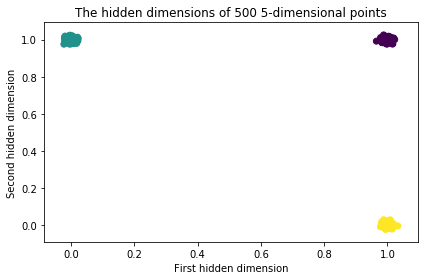

In [ ]:
n_sub = 500 # we use a subset of 500 samples from the original data

from scipy.special import expit

X_sub = X_train[0:n_sub]
y_sub = y_train[0:n_sub]

# Get the hidden representations
hiddens = expit(np.dot(X_sub, aenn.coefs_[0]) + aenn.intercepts_[0])

# Plot
fig = plt.figure()
hiddens += np.random.randn(n_sub,2)*0.01 # add a bit of noise for vizualization purposes
plt.scatter(hiddens[:, 1], hiddens[:, 0], c=y_sub)
plt.xlabel('First hidden dimension')
plt.ylabel('Second hidden dimension')
plt.title('The hidden dimensions of %d %d-dimensional points' % (X_sub.shape))
plt.tight_layout()

**Questions 7.8**

1. Does the plot behave as you expected? How so?
2. Run the same experiment again without changing the hyperparameters. What do you notice? Does the latent representation seems to have changed?
3. Would the plot have been different if we had simulated the data from 2 clusters instead of 4? Try it!
4. How could you use the information represented in the hidden layers?